# **TASK 1**

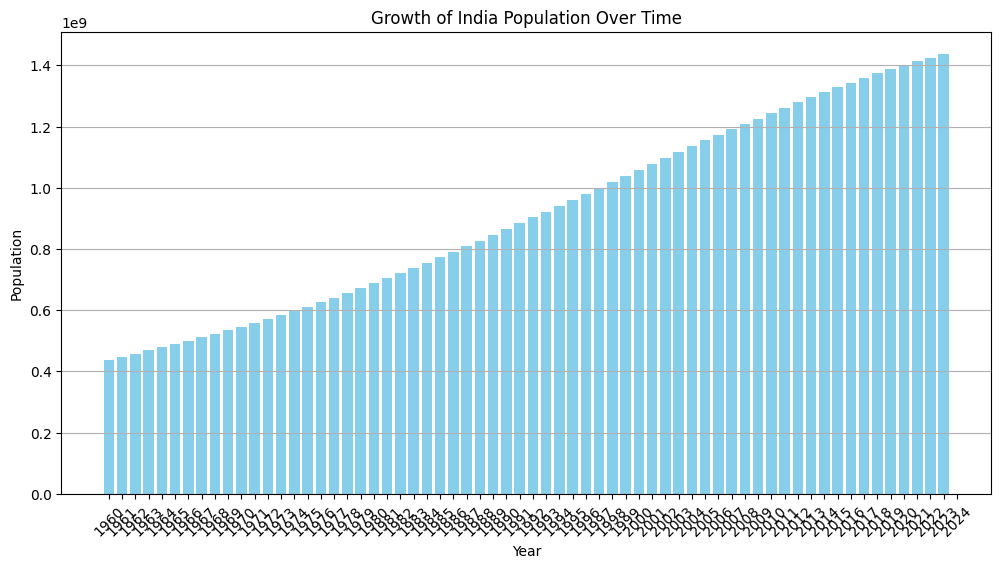

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Data
df = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_19373.csv', skiprows=4)
df.columns = df.columns.str.strip()  # Remove unwanted spaces

# Step 2: Select a Specific Country (e.g., India or any country you prefer)
country_name = 'India'
country_data = df[df['Country Name'] == country_name]

if country_data.empty:
    print(f"Error: '{country_name}' not found in the data.")
else:
    # Step 3: Extract Population Data for All Years
    years = country_data.columns[4:-1]
    population = country_data[years].values.flatten()

    # Step 4: Plot Bar Chart
    plt.figure(figsize=(12, 6))
    plt.bar(years, population, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Growth of {country_name} Population Over Time')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

## **TASK 2**

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

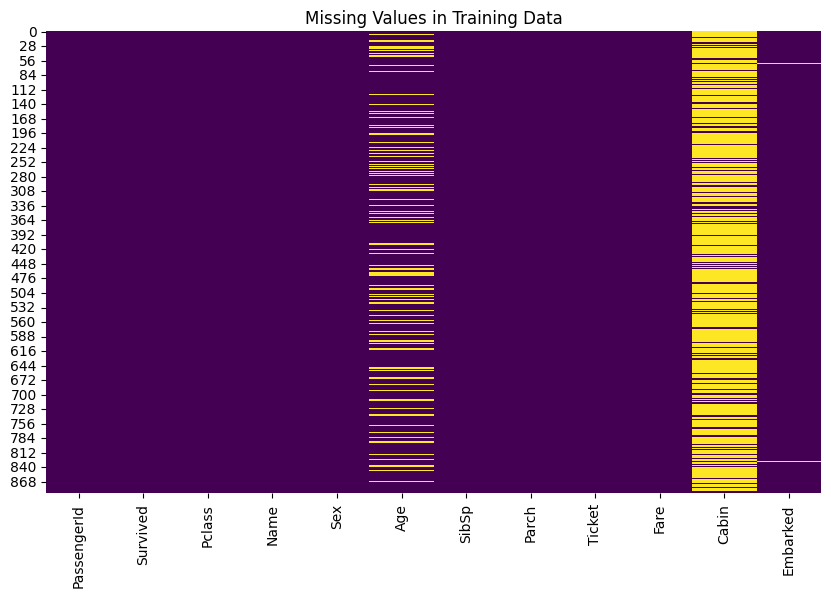

<ipython-input-5-8ba9cde9575b>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-5-8ba9cde9575b>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

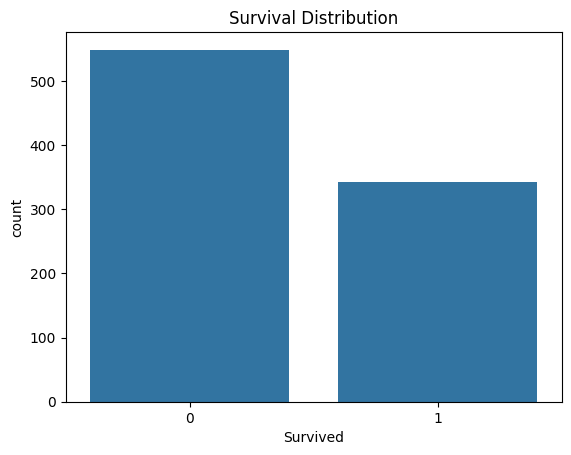

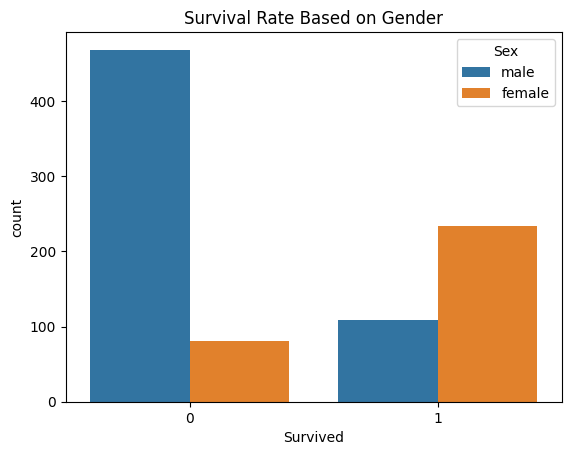

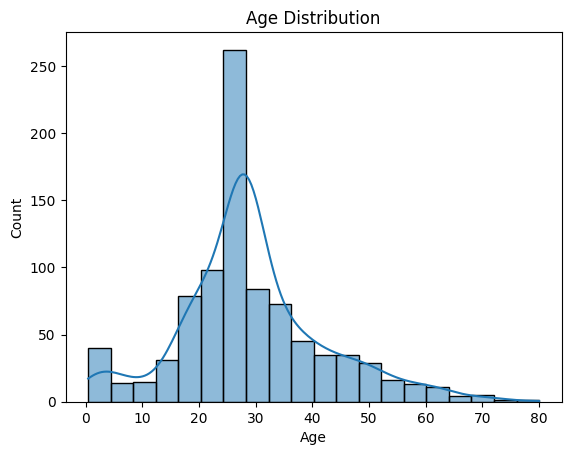

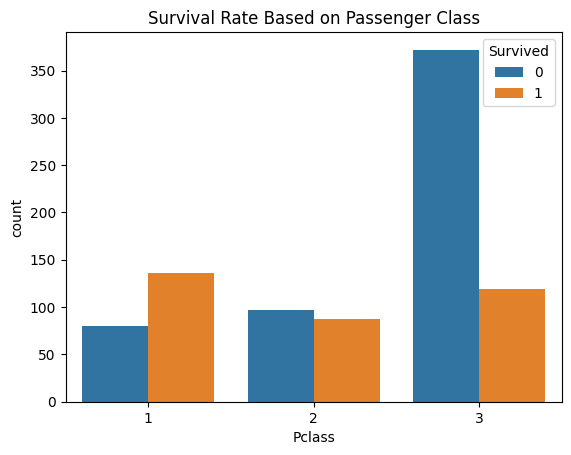

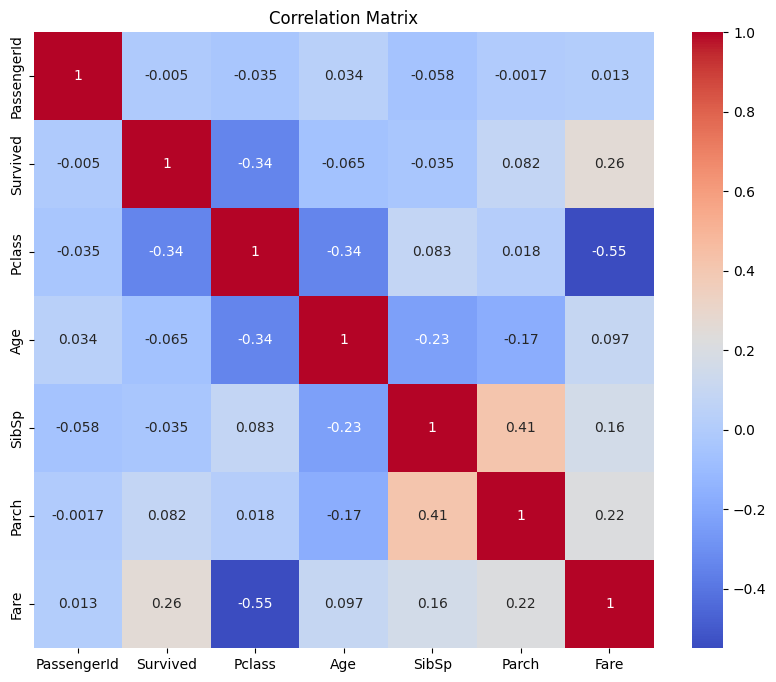


Data Cleaning and EDA Completed!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender_submission_df = pd.read_csv('/content/gender_submission.csv')

# Display basic information about the dataset
print("Training Data Info:")
print(train_df.info())

print("\nTest Data Info:")
print(test_df.info())

# Checking for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

# Visualizing missing values using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data')
plt.show()

# Data Cleaning: Fill missing Age using median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing Embarked values with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing Fare with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Exploratory Data Analysis (EDA)
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.show()

# Gender vs Survival
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Rate Based on Gender')
plt.show()

# Age Distribution
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Class vs Survival
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Rate Based on Passenger Class')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
correlation_data = train_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print("\nData Cleaning and EDA Completed!")

# **TASK 3**

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campa

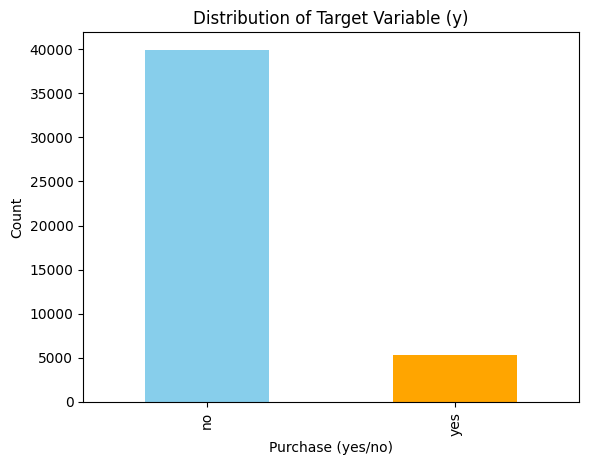

Accuracy: 0.90
Precision: 0.59
Recall: 0.38
F1 Score: 0.46


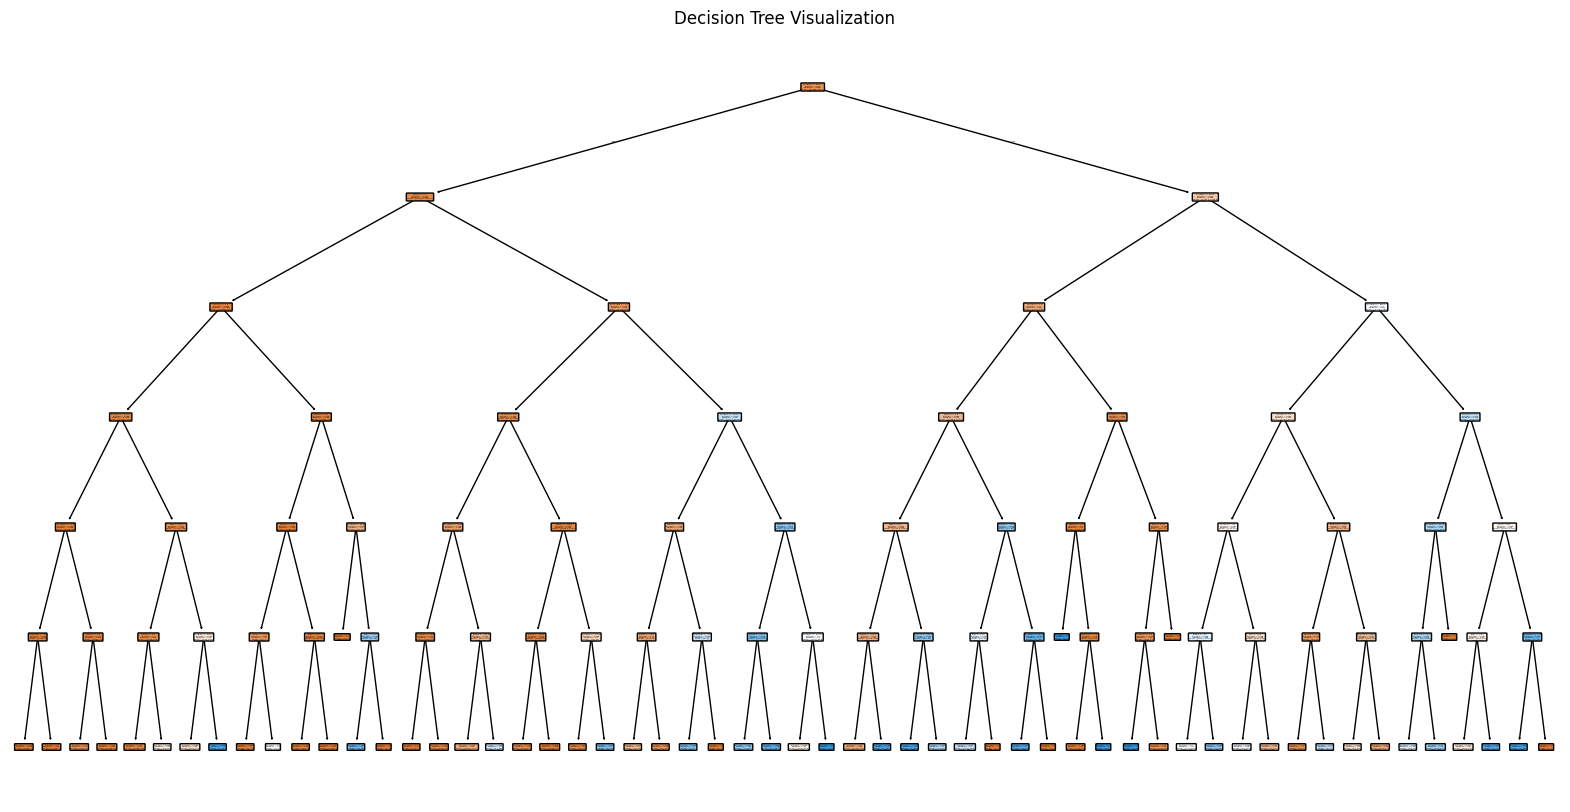

Decision Tree Classifier Completed!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree

# Load the dataset
df = pd.read_csv('/content/bank-full.csv', sep=';')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualizing the target variable
df['y'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Purchase (yes/no)')
plt.ylabel('Count')
plt.show()

# Encode categorical variables
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])

# Split data into features and target
X = df.drop('y', axis=1)
y = df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Model evaluation
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.2f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred):.2f}")

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

print("Decision Tree Classifier Completed!")


# **TASK 4**

<ipython-input-10-e11a4ff14db0>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


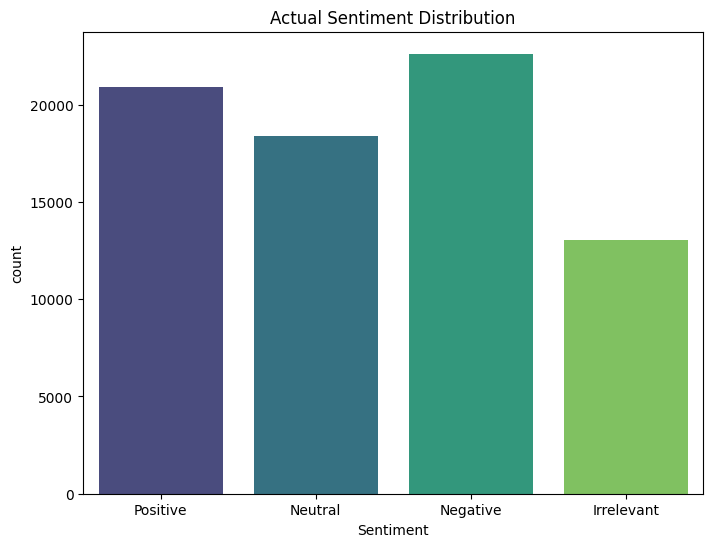

<ipython-input-10-e11a4ff14db0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Sentiment', data=df, palette='coolwarm')


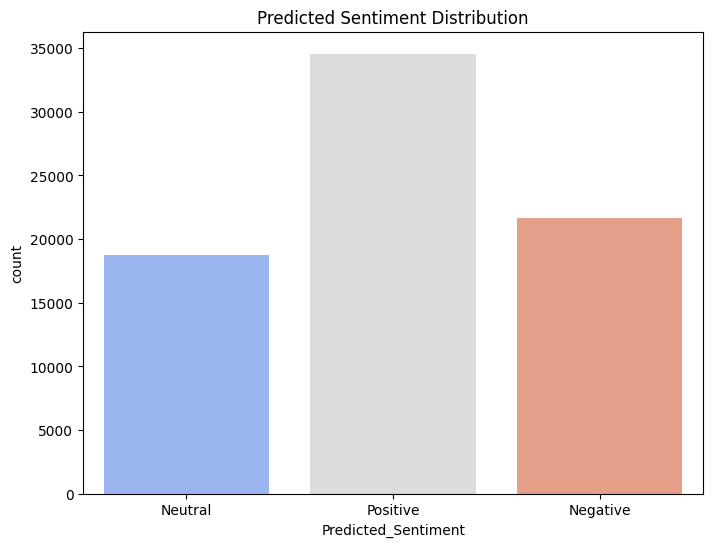

Sentiment Analysis and Visualization Completed!


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the datasets
train_df = pd.read_csv('/content/twitter_training.csv', header=None, names=['ID', 'Entity', 'Sentiment', 'Text'])
valid_df = pd.read_csv('/content/twitter_validation.csv', header=None, names=['ID', 'Entity', 'Sentiment', 'Text'])

# Combine datasets for a comprehensive analysis
df = pd.concat([train_df, valid_df])

# Data Cleaning
df = df.dropna(subset=['Text'])
df['Text'] = df['Text'].astype(str)

def get_sentiment(text):
    analysis = TextBlob(text)
    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

df['Predicted_Sentiment'] = df['Text'].apply(get_sentiment)

# Visualization: Actual Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Actual Sentiment Distribution')
plt.show()

# Visualization: Predicted Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Predicted_Sentiment', data=df, palette='coolwarm')
plt.title('Predicted Sentiment Distribution')
plt.show()

print("Sentiment Analysis and Visualization Completed!")
